In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
import os, re
import numpy as np
from scipy.stats import mode
from sklearn.impute import SimpleImputer

In [3]:
high = []
low = []
some_dataframe = []
for root, dirs, files in os.walk("./trajectories"):  
    for filename in files:
        conductivity = re.search("[^h](\d{2,3})",filename).group(1) 
        print './trajectories/' + filename
        dataset = np.genfromtxt('./trajectories/' + filename, delimiter=",", encoding="utf")
        size = dataset.shape[0]
        if conductivity == "200":
            high.append(size)
            some_dataframe.append(dataset)
        else:
            low.append(size)

./trajectories/Fish14 NE1 C200_clean.csv
./trajectories/Fish15 NE2 C200_clean.csv
./trajectories/Fish11 NE1 C200_clean.csv
./trajectories/Fish12 NE1 C30_clean.csv
./trajectories/Fish16 NE1 C30_clean.csv
./trajectories/Fish6 NE2 C200_clean.csv
./trajectories/Fish21 NE2 C200 take2_clean.csv
./trajectories/Fish18 NE1 C200_clean.csv
./trajectories/Fish19 NE1 C200_clean.csv
./trajectories/Fish7 NE1 C30_clean.csv
./trajectories/Fish1 NE1 C30_clean.csv
./trajectories/Fish5 NE2 C30_clean.csv
./trajectories/Fish19 NE2 C30_clean.csv
./trajectories/Fish8 NE1 C200_clean.csv
./trajectories/Fish20 NE2 C200_clean.csv
./trajectories/Fish4 NE2 C30_clean.csv
./trajectories/Fish21 NE1 C30_clean.csv
./trajectories/Fish10 NE1 C200_clean.csv
./trajectories/Fish2 NE1 C30_clean.csv
./trajectories/Fish3 NE1 C200_clean.csv
./trajectories/Fish2 NE2 C200_clean.csv
./trajectories/Fish17 NE2 C30_clean.csv
./trajectories/Fish17 NE1 C200_clean.csv
./trajectories/Fish12 NE2 C200_clean.csv
./trajectories/Fish14 NE2 C30

In [33]:
len(high), len(low)

(22, 20)

In [35]:
sum(high), sum(low)

(543551, 514307)

In [88]:
h = np.sum(np.c_[high]/999.0), np.sum(np.c_[low]/999.0)
np.c_[high]%999.0

array([[  0.],
       [  0.],
       [725.],
       [  0.],
       [  0.],
       [  0.],
       [ 50.],
       [  0.],
       [  0.],
       [400.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [918.],
       [  0.],
       [  0.],
       [  0.],
       [  0.]])

In [60]:
h = some_dataframe[2]
len(np.array_split(h, 27))
a = split_seq(h, 27)

In [75]:
def split_seq(seq, numpieces):
    seqlen = len(seq)
    d, m = divmod(seqlen, numpieces)
    rlist = range(0, ((d + 1) * (m + 1)), (d + 1))
    if d != 0: rlist += range(rlist[-1] + d, seqlen, d) + [seqlen]

    newseq = []
    for i in range(len(rlist) - 1):
        newseq.append(seq[rlist[i]:rlist[i + 1]])

    newseq += [[]] * max(0, (numpieces - seqlen))
    return newseq

In [104]:
a = np.asarray(a)
size_diff = 999 - a[-1].shape[0]
zero_diff = np.zeros((size_diff, 2))

In [162]:
zeroed_dataframe = np.concatenate((a[-1], zero_diff))
imp = SimpleImputer(missing_values=0,strategy="median", copy=True)
imp.fit(a[-1])

SimpleImputer(copy=True, missing_values=0, strategy='median', verbose=0)

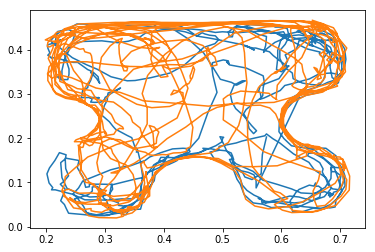

In [161]:
finished_dataframe = imp.transform(zeroed_dataframe)
plt.plot(finished_dataframe[:,0], finished_dataframe[:,1])
plt.plot(a[0][:,0], a[0][:,1])

This shows the difference between two models of the same label (high conductivity) that is filled 

array([0.35694324, 0.1811448 ])